## Supervised Learning Project

This case is about a bank which has a growing customer base. Majority of these 
customers are liability customers (depositors) with varying size of deposits. The number of 
customers who are also borrowers (asset customers) is quite small, and the bank is interested 
in expanding this base rapidly to bring in more loan business and in the process, earn more 
through the interest on loans. In particular, the management wants to explore ways of 
converting its liability customers to personal loan customers (while retaining them as 
depositors). A campaign that the bank ran last year for liability customers showed a healthy 
conversion rate of over 9% success. This has encouraged the retail marketing department to 
devise campaigns with better target marketing to increase the success ratio with minimal 
budget.
The department wants to build a model that will help them identify the potential customers 
who have higher probability of purchasing the loan. This will increase the success ratio while 
at the same time reduce the cost of the campaign.
The file Bank.xls contains data on 5000 customers. The data include customer demographic 
information (age, income, etc.), the customer's relationship with the bank (mortgage, 
securities account, etc.), and the customer response to the last personal loan campaign 
(Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan 
that was offered to them in the earlier campaign.

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Reading the file
df=pd.read_csv("Bank_Personal_Loan_Modelling-1.csv",index_col=0)
#taking backup of the data
df_backup=df.copy(deep=True)
#printting top 5 rows
df.head(5)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
#getting info on the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 546.9 KB


### All are non-object datatypes

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


### There are negative numbmers in experience! maybe typing error. 

In [6]:
#displaying -ve exp 
df[df["Experience"]<0]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0


In [7]:
# Convert to non-negative using abs function
df["Experience"]=abs(df["Experience"])
#df['Experience'] = df['Experience'].abs()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [8]:
# Column descriptions

##	Data Description:								
##									
##	ID	Customer ID							
##	Age	Customer's age in completed years							
##	Experience	#years of professional experience							
##	Income	Annual income of the customer #($000)							
##	ZIPCode	Home Address ZIP code.							
##	Family	Family size of the customer							
##	CCAvg	Avg. spending on credit cards per month ($000)							
##	Education	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional							
##	Mortgage	Value of house mortgage if any. ($000)							
##	Personal Loan	Did this customer accept the personal loan offered in the last campaign?							
##	Securities Account	Does the customer have a securities account with the bank?							
##	CD Account	Does the customer have a certificate of deposit (CD) account with the bank?							
##	Online	Does the customer use internet banking facilities?							
##	CreditCard	Does the customer use a credit card issued by UniversalBank?							


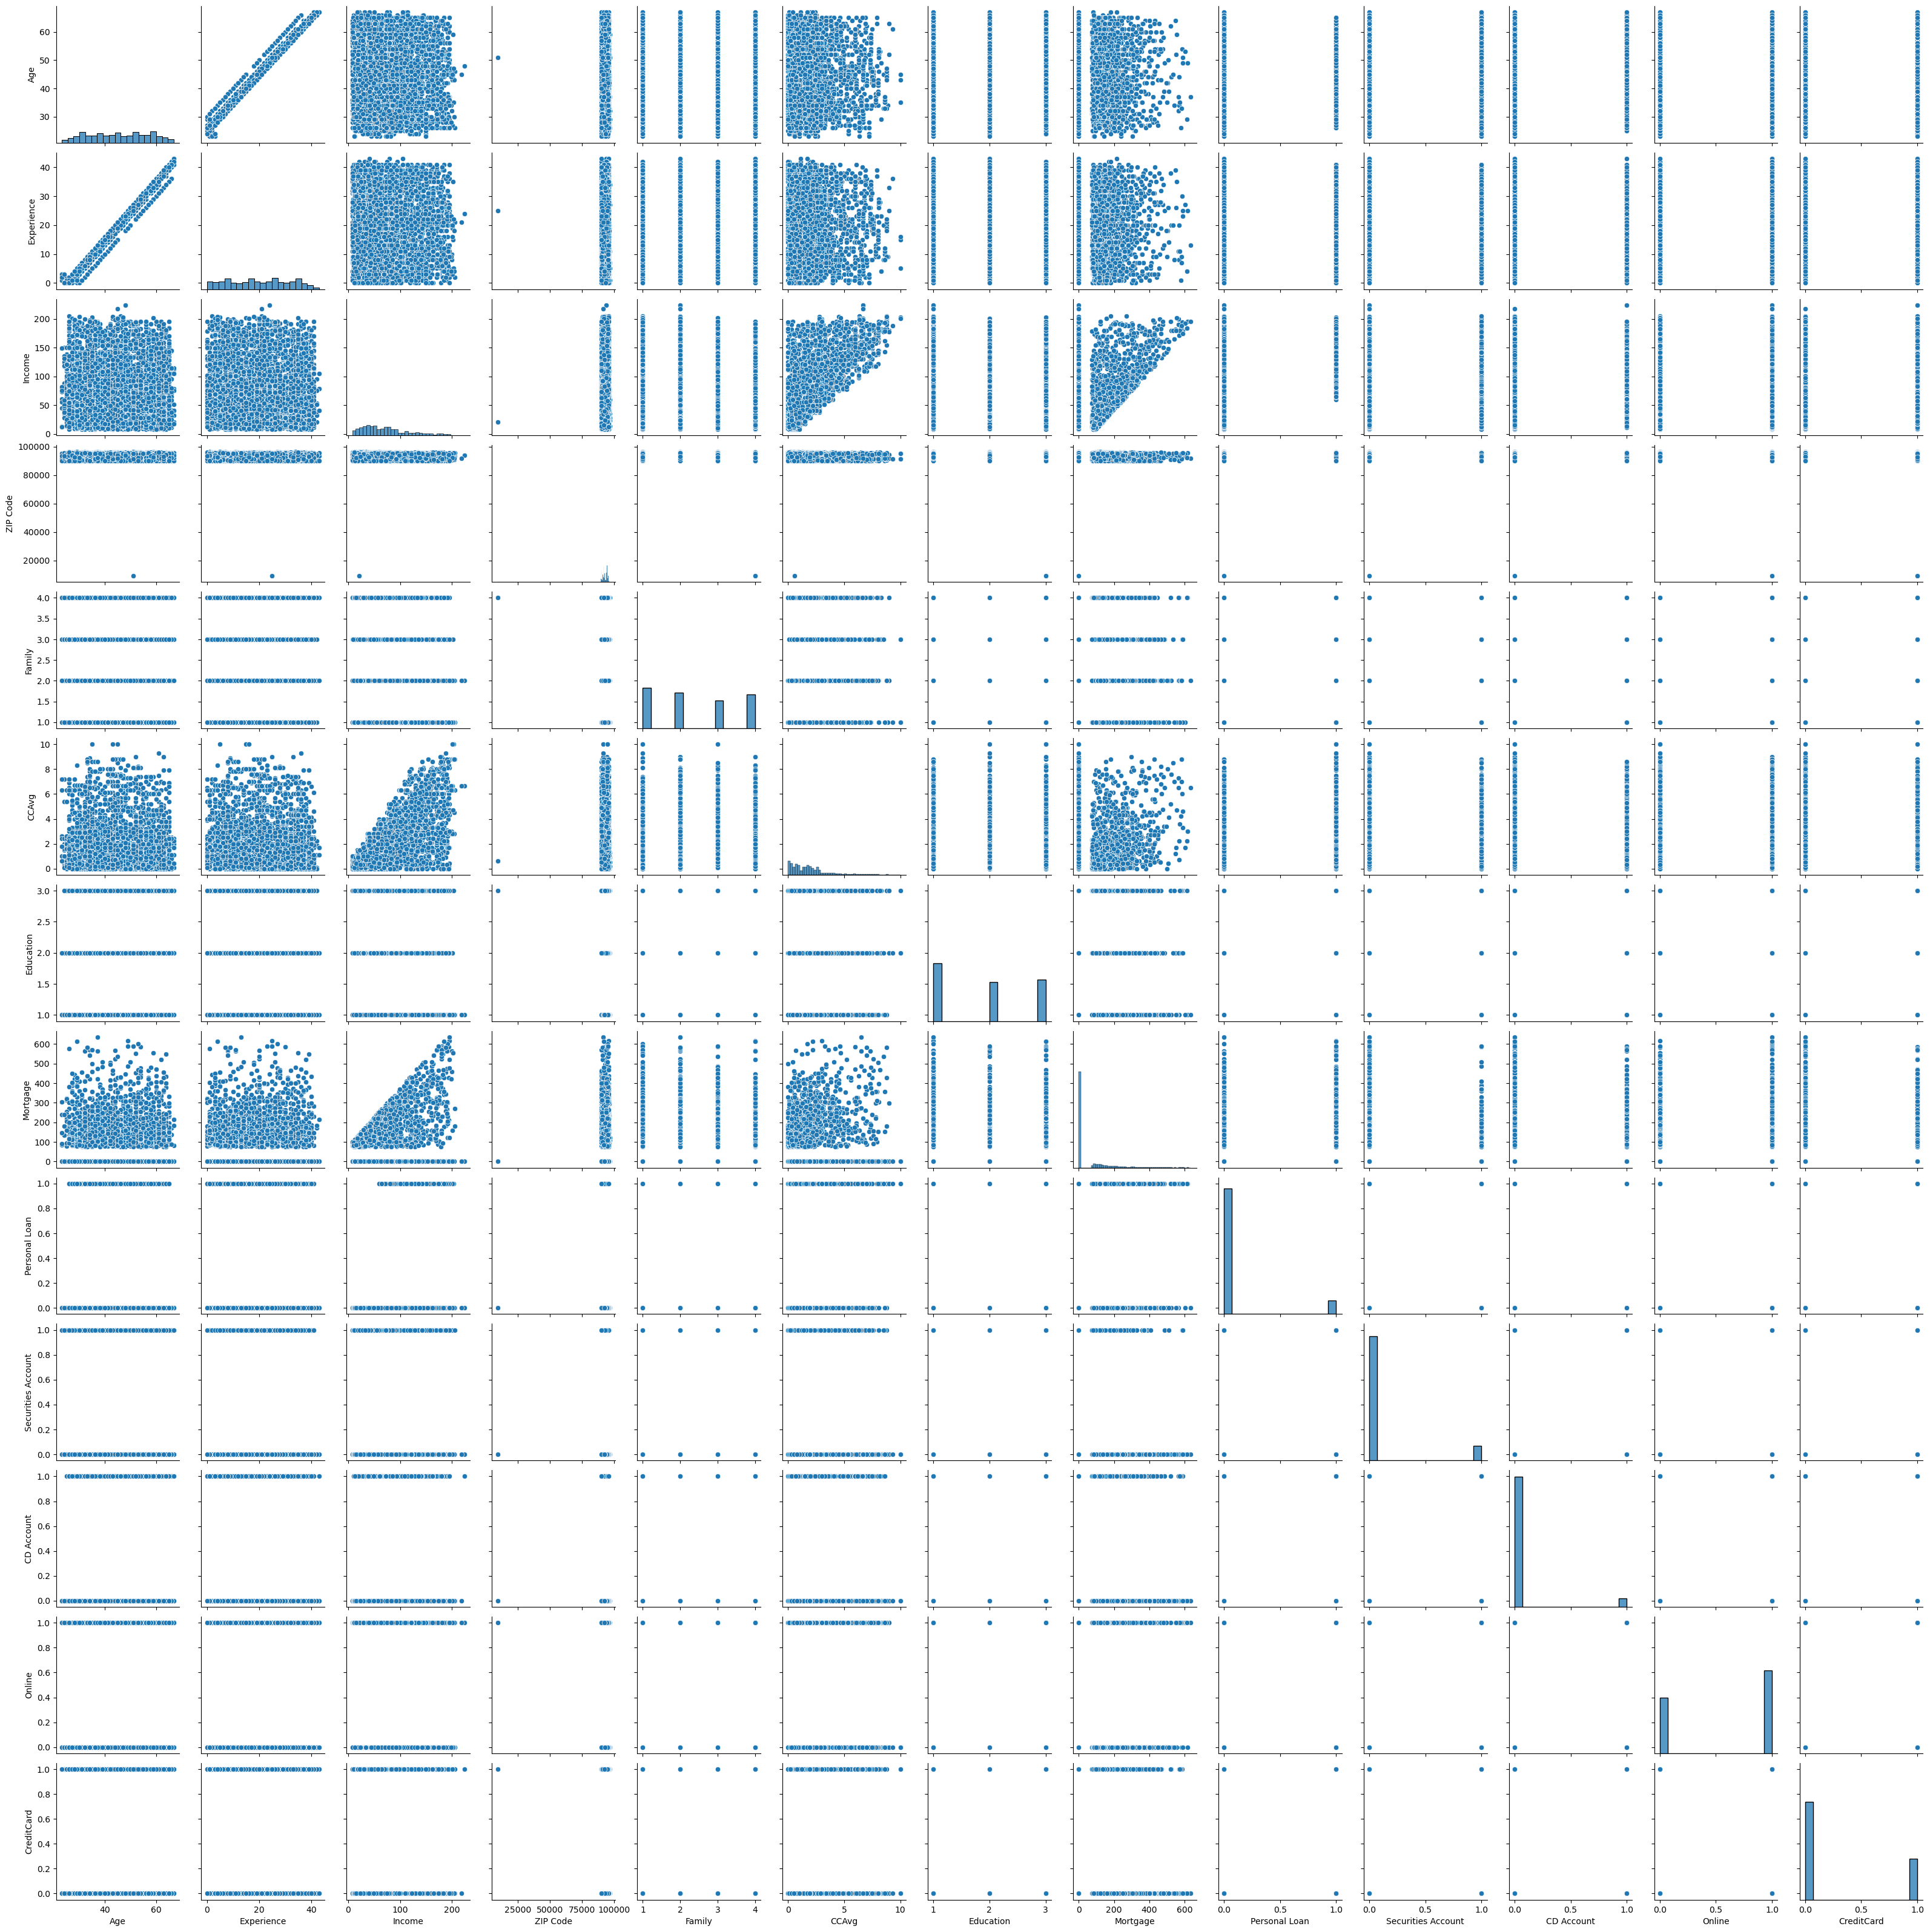

In [9]:
#compare all attributes visually to check for relationships that can be exploited
sns.pairplot(df)

### Observations:

#### Age and experience have strong positive relation
#### Age and income have no linear relationship
#### Age and experience have no linear relationship

C:\Users\yough\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

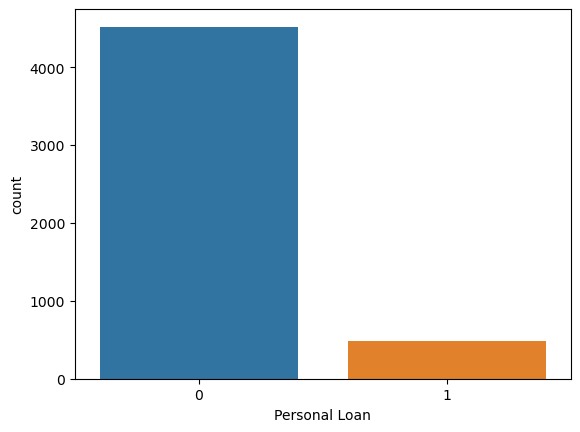

In [10]:
sns.countplot(df["Personal Loan"])

### Observations
#### The data set is skewed in terms of target column.
#### There are far few records in class 1 i.e. people who took the personal loan last time. But that is the class of interst to us! We have to identify potential customers and do not want any potential customer to be missed. 

In [11]:
# setting the features and labels to x and y respectively
x=df.drop("Personal Loan",axis=1)
y=df["Personal Loan"]

In [12]:
#splitting the data set into train and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

## ------------------------------------------------ Logistic Model --------------------------------------------------------

In [13]:
#logitic regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("output test prediction is ",y_pred)
test_score=lr.score(x_test,y_test)
print("Accuracy of test is ",test_score)
train_score=lr.score(x_train,y_train)
print("Accuracy of train is ",train_score)

output test prediction is  [0 0 0 ... 0 0 0]
Accuracy of test is  0.908
Accuracy of train is  0.9082857142857143


In [14]:
#### Accuracy of test and train look good but lets see the confusion matrix and classification report

In [15]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1318   33]
 [ 105   44]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1351
           1       0.57      0.30      0.39       149

    accuracy                           0.91      1500
   macro avg       0.75      0.64      0.67      1500
weighted avg       0.89      0.91      0.89      1500



#### The accuracy score of .908 looks impressive but do not forget, it is unreliable as it is a score at model level.
#### we will consider looking into class 1 since we need to focus on personal loan to get potential customers
#### the precision and recall for class 1 is low => f1 score is low
#### In confusion matrix, we can see that actual 1s are 149 out of only 44 is correctly detected  
## =>not a good model

##  ------------------------------------------- K Nearest Neighbours ------------------------------------------

In [16]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
lr=KNeighborsClassifier(n_neighbors=3)
sc=StandardScaler()
Scaled_xtrain=sc.fit_transform(x_train)
Scaled_xtest=sc.transform(x_test)
lr.fit(Scaled_xtrain,y_train)
y_pred=lr.predict(Scaled_xtest)
print("test prediction is /n",y_pred)
test_score=lr.score(Scaled_xtest,y_test)
print("accuracy of test is ",test_score)
train_score=lr.score(Scaled_xtrain,y_train)
print("sccuract of train is ",train_score)

test prediction is /n [1 0 0 ... 0 0 0]


C:\Users\yough\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yough\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

accuracy of test is  0.9486666666666667
sccuract of train is  0.974


C:\Users\yough\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [17]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1339   12]
 [  65   84]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.88      0.56      0.69       149

    accuracy                           0.95      1500
   macro avg       0.91      0.78      0.83      1500
weighted avg       0.95      0.95      0.94      1500



## ----------------------------------------------- Naive Bayes Model ---------------------------------------------

In [18]:
#Naive Bayes Model

from sklearn.naive_bayes import GaussianNB
lr=GaussianNB()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
#print("test prediction is ",y_pred)
test_score=lr.score(x_test,y_test)
print("Accuracy of test is ",test_score)
train_score=lr.score(x_train,y_train)
print("Accuracy of train is ",train_score)

Accuracy of test is  0.884
Accuracy of train is  0.8942857142857142


In [19]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1241  110]
 [  64   85]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1351
           1       0.44      0.57      0.49       149

    accuracy                           0.88      1500
   macro avg       0.69      0.74      0.71      1500
weighted avg       0.90      0.88      0.89      1500



#### We considered all 3 Models for classification there are other models which are better than these models 
## out of all 3 - Logistic Regression, Knn and Naive bayes models 
# Knn gives good precision and recall for class 1 